In [1]:
import numpy as np
import pandas as pd
import jieba
import re

In [2]:
text = pd.read_csv('C:/Users/heyangm/Desktop/nlp_lesson/data/sqlResult_1558435.csv',encoding='gb18030')

In [3]:
text.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [4]:
text['content'][0]

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [5]:
def cut(text): return ' '.join(jieba.cut(text))

In [6]:
main_content = pd.DataFrame()

In [7]:
main_content['title'] = text['title']

In [8]:
main_content['content'] = text['content'].fillna('')

In [9]:
main_content['tokenized_content'] = main_content['content'].apply(cut)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\heyangm\AppData\Local\Temp\jieba.cache
Loading model cost 0.841 seconds.
Prefix dict has been built succesfully.


In [10]:
feil_path = 'C:/Users/heyangm/Desktop/nlp_lesson/data/all_corpus.txt'

In [11]:
with open(feil_path,'w',encoding='utf-8') as f:
    f.write(' '.join(main_content['tokenized_content'].tolist()))

## 计算词频

In [12]:
tokens = [token for line in main_content['tokenized_content'].tolist() for token in line.split()]

In [13]:
tokens[:10]

['此外', '，', '自', '本周', '（', '6', '月', '12', '日', '）']

In [14]:
from collections import Counter

In [15]:
token_counter = Counter(tokens)

In [16]:
word_frequency = {w:counts/len(tokens) for w,counts in token_counter.items()}

In [17]:
frequences = sorted(list(word_frequency.values()),reverse=True)

In [18]:
X = range(len(frequences))

In [19]:
import matplotlib.pyplot as plt

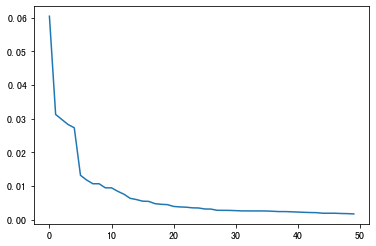

In [20]:
plt.plot(X[:50],frequences[:50])

##  PageRank

In [23]:
import networkx

In [24]:
adj_list = [[1,3,4,7],[2,5],[6,8],[9,10,11],[4,3,12]]

In [25]:
graph = networkx.graph.Graph()

In [26]:
for v, e in enumerate(adj_list):
    graph.add_edges_from([(v,to_n) for to_n in e])

C:\Users\heyangm\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


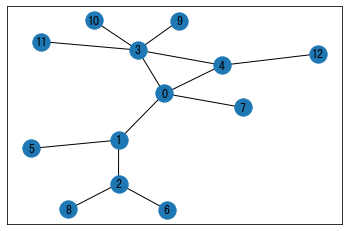

In [27]:
networkx.draw_networkx(graph)

In [29]:
ranking_result = networkx.pagerank(graph)

In [30]:
sorted(ranking_result.items(),key=lambda x:x[1],reverse=True)

[(3, 0.1710153515625564),
 (0, 0.13336652554455752),
 (4, 0.12977839182517642),
 (2, 0.12045204395944241),
 (1, 0.1104052905722436),
 (6, 0.04566746654473427),
 (8, 0.04566746654473427),
 (5, 0.04281927231199835),
 (9, 0.04061089709913097),
 (10, 0.04061089709913097),
 (11, 0.04061089709913097),
 (7, 0.03987917450012485),
 (12, 0.03911632533703903)]

##  从 PageRank 到 TextRank

In [31]:
import re

In [32]:
def get_summarization_by_text_rank(text, sum_len = 200):
    return get_summarization(text, text_rank, sum_len)

In [49]:
def get_summarization(text, score_fn, sum_len=200):
    sub_sentences = split_sentence(text)
    ranking_sentences = score_fn(sub_sentences)
    selecte_sen = set()
    current_sen = ''
    
    for sen, _ in ranking_sentences:
        if len(current_sen)<sum_len:
            current_sen += sen
            selecte_sen.add(sen)
        else:
            break
            
    summarized = []
    for sen in sub_sentences:
        if sen in selecte_sen:
            summarized.append(sen)
    return summarized

In [50]:
def text_rank(split_sentence):
    sentences_graph = get_sen_graph(' '.join(split_sentence))
    ranking_sentences = networkx.pagerank(sentences_graph)
    ranking_sentences = sorted(ranking_sentences.items(),key=lambda x:x[1],reverse=True)
    return ranking_sentences

In [51]:
def get_sen_graph(tokenized_text: str, window=3):
    tokeners = tokenized_text.split()
    keywords_graph = networkx.graph.Graph()
    for ii,t in enumerate(tokeners):
        word_tuples = [(tokeners[connect], t) 
                       for connect in range(ii-window, ii+window+1) 
                       if connect >= 0 and connect < len(tokeners)]
        keywords_graph.add_edges_from(word_tuples)
    return keywords_graph

In [129]:
def split_sentence(sentence):
    pattern = re.compile('[。，,.]：')
    split = pattern.sub(' ', sentence).split()  # split sentence
    return split

In [55]:
main_content.iloc[8]['content']  # 获取文章

'（原标题：武汉警方一下子抓了808人，还都是俊男靓女！原来他们每天偷偷摸摸干这事！）\r\n武汉警方一下子抓了808人，还都是俊男靓女！原来他们每天偷偷摸摸干这事！\r\n大家还记得今年4月光谷曾发生的一件大事吗？\r\n当时微博和朋友圈上都传疯了，\r\n说是光谷国际广场大量白领被捕！\r\n现场手铐都不够用！\r\n结果经记者深入调查后发现，\r\n这些被抓的并不是网传的“白领”\r\n而是一个有282名涉案人员的诈骗团伙！\r\n天呐！接近300人的犯罪团伙，\r\n你以为这个数字已经够庞大了吗？\r\n错，还有让你更震惊的！！\r\n据武汉市公安局通报：\r\n6月9日，警方在武汉三镇的10处窝点内，\r\n抓获了808名嫌疑人！\r\n而且令人大跌眼镜的是，\r\n他们当中大多都是年青人，\r\n用“俊男靓女”来形容也不为过！\r\n年纪不大，外形不差，那么到底是犯了什么事呢？\r\n其实说起来，这事估计绝大多数人都碰到过！那就是网络诈骗！\r\n涉案电脑800余台、手机2000余部、\r\n银行卡3000余张....\r\n因为涉及的账户太多，\r\n涉案金额目前还没统计出来。\r\n这是全国涉案人数最多的一起特大网络诈骗案！\r\n这些惊人的数字背后，究竟藏着什么样的秘密？警方把他们一锅端了！\r\n今年4月，武汉警方获悉在塔子湖地区有电信网络诈骗活动，经过2个多月的秘密侦查，发现了一个特大网络诈骗犯罪团伙。\r\n原来该团伙利用非法互联网金融平台，实施推荐股票、炒期货等诈骗，其10处窝点散布在江岸、洪山、东湖高新、硚口、江汉等5个区的写字楼内，涉案人员多达800余名！\r\n6月9日上午，武汉警方组织了1000余名警力，分成14个抓捕组，同时对首脑分子和10处窝点实施了突击抓捕行动！\r\n目前，警方已依法刑事拘留411人，对45人取保候审。该案还在进一步调查中。\r\n他们是如何进行诈骗的？\r\n人数众多的这个诈骗组织是怎么样进行人员分工？又是如何一步步引受害人上钩的呢？\r\n2015年以来，该犯罪团伙以投资组建的某集团公司为总部，旗下成立多家分公司、子公司，设立人事部、财务部、行政部等机构部门，分为经理、分析师、业务小组长、业务员等组织层级。\r\n在网上发布招聘信息招揽、培训业务员\r\n依托虚构的互联网金融平台，通过业务员散布“有内幕消

In [56]:
## 提取摘要
' '.join(get_summarization_by_text_rank(main_content.iloc[8]['content']))

'当时微博和朋友圈上都传疯了， 抢购高峰期，网页打开慢，网银交易出现比较迟钝现象。有不法分子会冒充客服或店主，以单子出现“调单”“卡单”等说法为幌子，故意说没有收到款项欺诈消费者，取得信任后要求消费者以其他办法进行转账。 识骗方法：消费者要注意，调单、卡单、激活订单等多为诈骗术语，见此类词语基本可以断定对方是骗子。没有收到款项这样的问题，是不会在东京、天猫这样的大型网络购物平台出现的。 抢购高峰期，网页打开慢，网银交易出现比较迟钝现象。有不法分子会冒充客服或店主，以单子出现“调单”“卡单”等说法为幌子，故意说没有收到款项欺诈消费者，取得信任后要求消费者以其他办法进行转账。 识骗方法：消费者要注意，调单、卡单、激活订单等多为诈骗术语，见此类词语基本可以断定对方是骗子。没有收到款项这样的问题，是不会在东京、天猫这样的大型网络购物平台出现的。 识骗方法：如果接到网上购物退款的电话或短信等信息，一定要谨慎对待，切莫泄露银行卡账号、户名，动态验证码等个人信息。'

In [57]:
import random

In [64]:
def show_result():
    for index in random.sample(list(range(len(main_content))), 30):
        content = main_content.iloc[index]['content']
        if len(content)>1000:
            print('Original text:\n')
            print(content)
            print('summarization:\n')
            print( ' '.join(get_summarization_by_text_rank(content)))
            print('----------------------------------------------------------\n')
            print('\n')

In [65]:
show_result()

Original text:

　　新华社成都5月31日电题：藏汉两支书携手种出高原“脱贫果”\n　　新华社记者惠小勇、叶建平、魏兆阳\n傍晚，炉霍县海拔3200多米的鲜水河谷，一排排灰白相间的大棚，在落日余晖下显得蔚为壮观。这是四川甘孜藏区第一个成规模的绿色蔬菜产业园。\n　　34岁的藏族妇女阿佳，提着水桶正要离开大棚。“是镇上介绍我来这里工作的。前两个月每天80元，这个月涨到了100元。”\n　　阿佳是四川甘孜藏族自治州炉霍县斯木镇若海村人。爱人因病去世后，她独自拉扯着两个10多岁的孩子，是镇上重点帮扶的困难户。\n　　3个月前，阿佳辞掉了县城小学的“临时工”，穿上了蔬菜基地的绿色工装。与每月增收1000多元相比，变化更大的是，阿佳不再是那个只会种青稞、小麦等传统农作物的藏族妇女，而成为了一名能在高原上种植番茄、黄瓜等蔬菜水果的“职业农民”。\n　　在这个高原藏区有机蔬菜示范基地里，像阿佳这样家庭困难的“职业农民”有20多位。基地是盛煌农业公司投资打造的，老板盛学武来自我国“蔬菜之乡”山东寿光。在老家化龙镇乐业村，老盛是担任过26年村支书的致富领头人。\n　　年近六旬的老盛，为何要千里迢迢从齐鲁大地跑到雪域高原种植蔬菜呢？原来，老盛的儿子盛珂曾在武警部队工作，2008年驻守甘孜时，深感高原上吃不到新鲜蔬菜。2011年，老盛卸任村支书后，决定和儿子一起到藏区发展高原现代农业。\n　　然而，老盛的基地建设，起步并不顺利——在藏区，大多数群众并不了解和熟悉在内地早已大范围推广的土地流转制度。\n　　幸运的是，老盛遇到了交流顺畅的“同行”：已担任吉绒村村支书7年的郎吉。于是，一个藏族村支书，一个汉族“老支书”，一家一户地走，一笔一笔地算账，进行了一场“思想动员战”。\n　　“种青稞、小麦等，每亩年收入仅300多元；流转后每亩年租金500元、保底分红100元。”郎吉说，刚开始，大家还有点不信。后来，先流转的几户人家拿到了钱，大家就开始争着流转。吉绒村共58户人家、900多亩地。短短几个月，共流转200多亩土地，涉及17户人家。\n很快，隔壁的若海村也提出，希望公司流转他们的土地。目前，盛煌农业公司仅在斯木镇就流转了500多亩土地，建起了40个大棚。\n　　流转土地的群众实现了增收，而根据流转协议，基地用工优先考虑村里人，村里优先安排贫困户。据统计，去年基地共支出劳务工资1

# Sentences embedding for text_summary

In [84]:
import gensim

In [89]:
#加载搜狗词向量
model = gensim.models.KeyedVectors.load_word2vec_format('E:/data/sgns.sogou.bigram', encoding='utf-8') 

In [90]:
def SIF_sentence_embedding(text,alpha=1e-4):
    global word_frequency
    
    max_fre = max(word_frequency.values())
    sen_vec = np.zeros_like(model.wv['测试'])
    words = cut(text).split()
    words = [w for w in words if w in model]
    
    for w in words:
        fre = word_frequency.get(w,max_fre)
        weight = alpha/(fre+alpha)
        sen_vec += weight*model.wv[w]
        
    sen_vec /= len(words)
    #skip SVD
    return sen_vec

In [91]:
from scipy.spatial.distance import cosine

In [92]:
def get_corr(text,embed_fn=SIF_sentence_embedding):
    if isinstance(text,list): text = ' '.join(text)
        
    sub_sentences = split_sentence(text)
    sen_vec = embed_fn(text)
    
    corr_score = {}
    
    for sen in sub_sentences:
        sub_sen_vec = embed_fn(sen)
        corr_score[sen] = cosine(sen_vec,sub_sen_vec)
        
    return sorted(corr_score.items(),key=lambda x:x[1],reverse=True)

In [96]:
def get_summarization_by_sen_emb(text,max_len=300):
    return get_summarization(text,get_corr,max_len)

In [99]:
main_content['content'].iloc[8]

'（原标题：武汉警方一下子抓了808人，还都是俊男靓女！原来他们每天偷偷摸摸干这事！）\r\n武汉警方一下子抓了808人，还都是俊男靓女！原来他们每天偷偷摸摸干这事！\r\n大家还记得今年4月光谷曾发生的一件大事吗？\r\n当时微博和朋友圈上都传疯了，\r\n说是光谷国际广场大量白领被捕！\r\n现场手铐都不够用！\r\n结果经记者深入调查后发现，\r\n这些被抓的并不是网传的“白领”\r\n而是一个有282名涉案人员的诈骗团伙！\r\n天呐！接近300人的犯罪团伙，\r\n你以为这个数字已经够庞大了吗？\r\n错，还有让你更震惊的！！\r\n据武汉市公安局通报：\r\n6月9日，警方在武汉三镇的10处窝点内，\r\n抓获了808名嫌疑人！\r\n而且令人大跌眼镜的是，\r\n他们当中大多都是年青人，\r\n用“俊男靓女”来形容也不为过！\r\n年纪不大，外形不差，那么到底是犯了什么事呢？\r\n其实说起来，这事估计绝大多数人都碰到过！那就是网络诈骗！\r\n涉案电脑800余台、手机2000余部、\r\n银行卡3000余张....\r\n因为涉及的账户太多，\r\n涉案金额目前还没统计出来。\r\n这是全国涉案人数最多的一起特大网络诈骗案！\r\n这些惊人的数字背后，究竟藏着什么样的秘密？警方把他们一锅端了！\r\n今年4月，武汉警方获悉在塔子湖地区有电信网络诈骗活动，经过2个多月的秘密侦查，发现了一个特大网络诈骗犯罪团伙。\r\n原来该团伙利用非法互联网金融平台，实施推荐股票、炒期货等诈骗，其10处窝点散布在江岸、洪山、东湖高新、硚口、江汉等5个区的写字楼内，涉案人员多达800余名！\r\n6月9日上午，武汉警方组织了1000余名警力，分成14个抓捕组，同时对首脑分子和10处窝点实施了突击抓捕行动！\r\n目前，警方已依法刑事拘留411人，对45人取保候审。该案还在进一步调查中。\r\n他们是如何进行诈骗的？\r\n人数众多的这个诈骗组织是怎么样进行人员分工？又是如何一步步引受害人上钩的呢？\r\n2015年以来，该犯罪团伙以投资组建的某集团公司为总部，旗下成立多家分公司、子公司，设立人事部、财务部、行政部等机构部门，分为经理、分析师、业务小组长、业务员等组织层级。\r\n在网上发布招聘信息招揽、培训业务员\r\n依托虚构的互联网金融平台，通过业务员散布“有内幕消

In [100]:
''.join(get_summarization_by_sen_emb(main_content['content'].iloc[8]))

C:\Users\heyangm\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
C:\Users\heyangm\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if sys.path[0] == '':


'当时微博和朋友圈上都传疯了，现场手铐都不够用！结果经记者深入调查后发现，错，还有让你更震惊的！！据武汉市公安局通报：抓获了808名嫌疑人！而且令人大跌眼镜的是，他们当中大多都是年青人，用“俊男靓女”来形容也不为过！网友热评刑法守望者：宇宇家的小仙女：恐怖进了一个星期发现不太对劲?赶紧自己跑路了z_路漫漫：我做过，?后来听说公司跑路了a一元复始c：有强迫症的天蝎座怪咖：吓到我了冉冉的彗星是个宝：早上还接到说做期货霖心金鱼And张蒙：都不敢去找工作了蒋妈妈1看了网友的评论，小编只有一个感觉：找工作时一定要擦亮双眼不要因为一时疏忽，而给自己的生活抹上污点！俗话说，知己知彼百战不殆网络防骗攻略5预购诈骗6中奖诈骗'

In [101]:
get_corr(main_content['content'].iloc[6])

C:\Users\heyangm\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
C:\Users\heyangm\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if sys.path[0] == '':
C:\Users\heyangm\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


[('3', 0.662529855966568),
 ('FS8016', nan),
 ('GeekBench', nan),
 ('4GB', nan),
 ('14', 0.6785918176174164),
 ('Kryo', nan),
 ('核心设计，集成', 0.442205011844635),
 ('Adreno', nan),
 ('512', 0.35424256324768066),
 ('GPU', nan),
 ('X12', nan),
 ('LTE', nan),
 ('OPPO', nan),
 ('EDGEST', nan),
 ('302SH', nan),
 ('5', 0.7027278244495392),
 ('28', 0.6974339187145233),
 ('和', 0.6537487804889679),
 ('在', 0.6141084730625153),
 ('R11。骁龙', 0.5825803875923157),
 ('260', 0.503925234079361),
 ('的内存。骁龙', 0.4773767590522766),
 ('纳米工艺，八个', 0.4714673161506653),
 ('660', 0.4398358464241028),
 ('年退出中国市场，但是今年', 0.43910861015319824),
 ('820', 0.43433916568756104),
 ('近日，一款型号为', 0.4141673445701599),
 ('处理器，配备有', 0.32164937257766724),
 ('2013', 0.31936776638031006),
 ('月份的媒体沟通会上，惠普罗忠生表示：“我敢打赌，12', 0.3024349808692932),
 ('与高通签署了排他性协议，可以独占两三个月时间。', 0.28841453790664673),
 ('调制解调器。', 0.28779780864715576),
 ('当前市面上只有一款机子采用了骁龙', 0.25583094358444214),
 ('款的全面屏手机。', 0.2547796964645386),
 ('年推出全球首款全面屏手机', 0.23584079742431